<a href="https://colab.research.google.com/github/HashiniUdara/langchain/blob/main/RAGapplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE RAG Applicatoion** using Langchain and Open AI

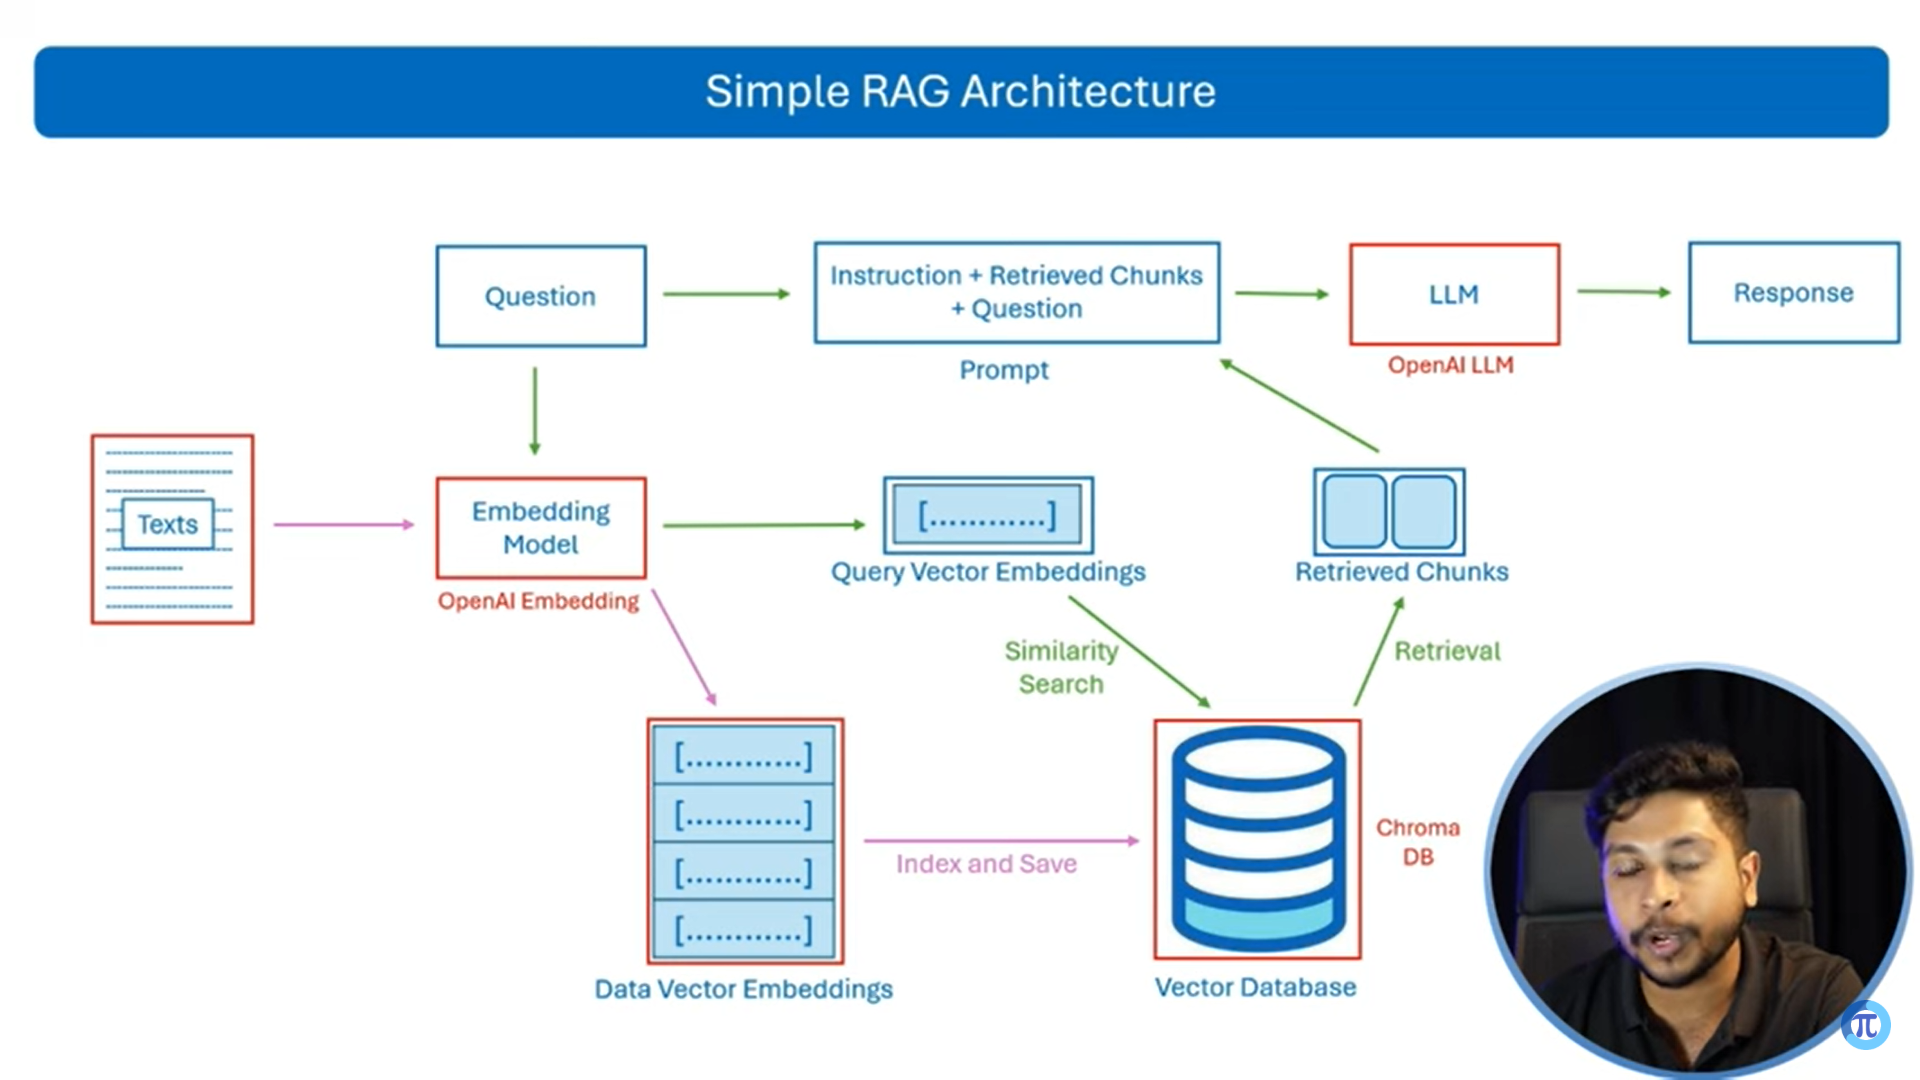

In [ ]:
# install the necessary package
!pip install langChain -qU
!pip install langchain-openai -qU
!pip install langchain-chroma -qU  #vector DB


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.3/438.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.1 MB/s eta 0:00:

In [ ]:
#import necessary libraries
import os
from google.colab import userdata

initialize OpenAI LLM

In [ ]:
from langchain_openai import ChatOpenAI
# set open AI api key
os.environ['OPENAI_API_KEY'] = userdata.get("OPENAI_API_KEY")

#initialize the chatopenAI model
llm = ChatOpenAI(model="gpt-3.5-turbo",
                 temperature=0
                 )

Initialize embedding model

In [ ]:
from langchain_openai import OpenAIEmbeddings
embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

Create and Embed Documents

In [ ]:
from langchain_core.documents import Document

# define a list of documents with content and metadata
documents = {
    Document(
        page_content="Sri Lanka’s Anudi Gunasekara has advanced to the 20 finalists of the Head to Head Challenge at the 72nd Miss World, underway in Hyderabad, India. Anudi has been named among the Top 5 finalists from Asia, a historic achievement, as she becomes the first Sri Lankan ever to be placed as a finalist in this segment.Anudi has also set another incredible record, becoming the only contestant from Asia to be a finalist in both the Head to Head and Talent rounds this year. The Head to Head Challenge at the 72nd Miss World offers a global platform where contestants can highlight some of the most pressing issues affecting communities today. The 72nd Miss World, which commenced on 07 May, will see the reigning Miss World, Krystyna Pyszková from Czechia, crown her successor on 31 May 2025.",
        metadata={"source":"miss wolrld 2025"},
    ),
    Document(
        page_content="Colombo, May 24 (Daily Mirror)- A 21-year-old local youth returning from Dubai via Qatar was arrested by the airport police for trying to smuggle in foreign cigarettes worth over Rs. 3.5 million. The Bandaranaike International Airport Police Unit officials on information arrested the youth when he tried to leave the airport premises after completing necessary checking. Police found 20,000 sticks of a brand of cigarettes and 3,600 sticks of another brand of cigarettes from his bags. The suspect, a resident of Yatiyantota was to be produced before the Negombo Magistrate’s Court.OIC Airport Police Elmo Malcolm and the team are conducting investigations.",
        metadata={"source":"daily mirror"}
    ),
    Document(
        page_content="The final rites of veteran actress Malini Fonseka will be held with full state honours on 26 May (Monday) at Independence Square, according to the Minister of Cultural Affairs.The remains of the late Sri Lankan cinema icon, widely celebrated as the “Queen of Sri Lankan Cinema,” will lie in state for public viewing at the Tharangani Hall of the National Film Corporation on 25 May (Sunday), from 10:00 a.m. Accordingly, the state funeral ceremony will take place the following evening at Independence Square in Colombo.Malini Fonseka passed away in the early hours today (24) at the age of 78, while receiving treatment at a private hospital in Colombo.Known as the “Queen of Sinhala Cinema,” Malini Fonseka (1949–2025) was a legendary Sri Lankan actress, director, and former parliamentarian. With a career spanning over 60 years, she acted in more than 140 films and earned numerous national and international",
        metadata={"source":"ada derana"}
    ),
}

create a vector store using the documents and embedding model
(save text the data in DB)

In [ ]:
from langchain_chroma import Chroma

vectorstore = Chroma.from_documents(
    documents,
    embedding = embedding_model,
)

perform similarity search

In [ ]:
# here we give the text to search
results = vectorstore.similarity_search("miss world")

for result in results:
  print("-----------------------")
  print(resulr.page_content)
  print(result.metadata)

In [ ]:
results = vectorstore.similarity_search("malini fonseka")

for result in results:
  print("-----------------------")
  print(resulr.page_content)
  print(result.metadata)

Embed query and perform similarity search by vector

In [ ]:
# here we give embedding to search

# first get the embedding
query_embedding = embedding_model.embed_query("miss world")

# get the first 10 values of embedded query
query_embedding[:10]

# print the length of the query embedding
len(query_embedding)

In [ ]:
results = vectorstore.similarity_search_by_vector(query_embedding)

for result in results:
  print("-----------------------")
  print(resulr.page_content)
  print(result.metadata)

create retriever and retrieve data from vector store

In [ ]:
# create a retriever from the vectorstore
retriever = vectorstore.as_retriever(
    serch_type="similarity",
    search_kwargs={"k":1},#number of results we want to get
)

# perform batch retrieval using the retriever
batch_results = retriever.batch(["miss world","smuggle"])

for result in batch_results:
  print("------------------")
  for doc in result:
    print(doc.page_content)
    print(doc.metadata)

create prompt template

In [ ]:
from langchain_core.prompts import ChatPrompt Template
from langchain_core.runnables import RunnablePassthrough

# Define a message  template for the chatbot
message = """
Answer this question using the provided context only.
{question}

Context:
{context}
"""

# Create a chat prompt template from the message
prompt = ChatpromptTemplate.from_message([("human",message)])

Chain retriever and prompt template with LLM

In [ ]:
chain = {"context":retriever, "question":RunnablePassThrough()} | prompt | llm

In [ ]:
response = chain.invoke("who represent 72nd miss world from sri lanka")
print(response.content)